<a href="https://colab.research.google.com/github/aeryy-afk/Linear_Regretion/blob/main/logistic_Regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
print(df.info)

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
580,0,151,90,46,0,42.1,0.371,21
418,1,83,68,0,0,18.2,0.624,27
764,2,122,70,27,0,36.8,0.340,27
363,4,146,78,0,0,38.5,0.520,67
757,0,123,72,0,0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Pisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model regresi logistik
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Buat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Model klasifikasi memiliki akurasi 75%. Model ini lebih baik dalam memprediksi orang yang tidak menderita diabetes (akurasi lebih tinggi untuk kelas 0). Untuk orang yang menderita diabetes (kelas 1), model kurang presisi (ada prediksi positif yang salah) dan kurang sensitif (ada kasus diabetes yang tidak terdeteksi).

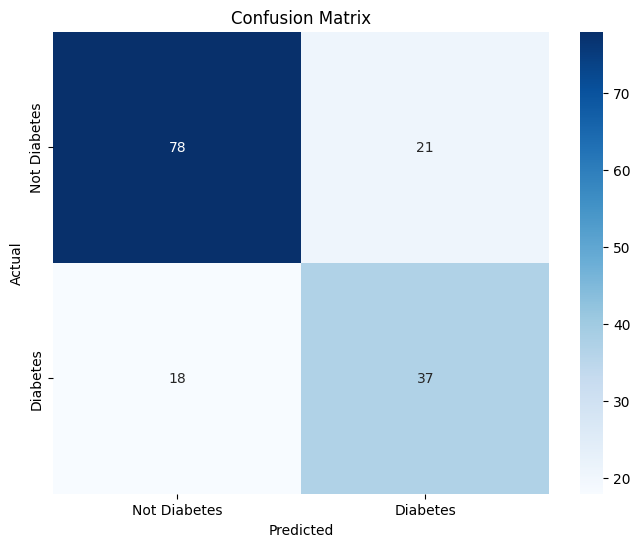

In [6]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Positive: kanan bawah dengan warna greyblue Model benar memprediksi diabetes, dan orangnya memang diabetes.
False Positive: kanan atas dengan warna lightblue Model salah memprediksi diabetes, padahal orangnya tidak diabetes.
True Negative: data kiri atas dengan warna biru gelap. Model benar memprediksi tidak diabetes, dan orangnya memang tidak diabetes.
False Negative: kiri bawah dengan warna lightblue Model salah memprediksi tidak diabetes, padahal orangnya diabetes.

In [12]:
# Tampilkan beberapa baris pertama dari y_test
print("Nilai Sebenarnya (y_test):")
print(y_test.head())

# Tampilkan beberapa baris pertama dari y_pred
print("\nHasil Prediksi (y_pred):")
# Convert y_pred to a pandas Series for easier display and comparison
y_pred_series = pd.Series(y_pred, index=y_test.index)
print(y_pred_series.head())

Nilai Sebenarnya (y_test):
668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

Hasil Prediksi (y_pred):
668    0
324    0
624    0
690    0
473    0
dtype: int64


model Regresi Logistik ini cukup baik dalam memprediksi orang yang tidak menderita diabetes (akurasi 75% secara keseluruhan), namun kurang efektif dalam mendeteksi kasus diabetes yang sebenarnya (ada kasus diabetes yang tidak terdeteksi).
